In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [64]:
data = pd.read_csv("./data_full.csv", sep = ";", error_bad_lines=False)

b'Skipping line 10780784: expected 10 fields, saw 11\nSkipping line 10793876: expected 10 fields, saw 11\n'
b'Skipping line 10821923: expected 10 fields, saw 11\n'
/Users/Elena/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [19]:
catalog = pd.read_csv("./catalog.csv", sep = ";", error_bad_lines=False)

In [20]:
data.head()

,timestamp,ip,track_id,cookie,live,user_id,referer,uagent,rightholder,author_id
0,1517778000,230.59.74.120,10912114,42536dc7a8578b0cfac05f704977429a,0,NaN,https%3A%2F%2Frutube.ru%2Fvideo%2F0f5c9c5839b1...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,2,1480930
1,1517778000,218.222.225.36,10885813,8f92f3f2b1e7a2498761b8cb3b1d03c3,0,NaN,https%3A%2F%2Frutube.ru%2Fvideo%2Fd8068436dcf5...,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,2,301323
2,1517778000,55.63.241.224,6948236,336d5ebc5436534e61d16e63ddfca327,-,2.231332e+09,http%3A%2F%2Fandroid.rutube.ru%2F,okhttp/2.6.0,-,-
3,1517778000,230.34.98.99,8481402,cf8dd809edf104873a1c57921b34f25e,0,NaN,https%3A%2F%2Frutube.ru%2Fvideo%2F1058cf249e46...,Mozilla/5.0 (Linux; Android 7.1.2; Redmi 4X Bu...,NaN,721346
4,1517778000,232.3.41.226,10908060,4ca525a1d60de6d74e3c32529fe47ab5,0,NaN,https%3A%2F%2Fyastatic.net%2Fvideo-player%2F0x...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,135,599848


In [9]:
data.shape

(10964431, 10)

In [21]:
catalog.head()

,idec,track_id,video_id,series_id,title,season,episode,episode_global,date_efir,duration
0,PR592505,10258734,cd59084eb50e6ebe9fe20ad04e0c17db,10456854280,"\tБыть или не быть, 1 сезон, 1 серия",1,1,1,02.04.2017 22:00:34,null
1,PR609630,10843255,a5d2e6bae4752d9ec0fae9b53f00700d,10592468551,NaN,11,1,1,null,null
2,PR597128,10573153,bcd45606c1f7cbb5cb9d1dbd7d346cc3,10479562619,NaN,7,1,1,06.09.2017 22:46:05,null
3,PR257331,6617650,609217ac7b8c4e55d44c4a29bf52554b,null,"""Интерны. История болезни""",null,null,null,12.06.2012 22:00:44,null
4,PR529698,7991493,bde3620ba038b3e8dd41d03bf516a7eb,10241019893,#ЖАННАПОЖЕНИ,1,1,101,05.09.2015 13:30:00,null


In [ ]:
pd.scatter_matrix(df[['wage', 'exper', 'educ', 'looks']], 
                  figsize=(15, 15), diagonal='kde')
plt.show()

In [50]:
data["timestamp"].describe()

count    1.096443e+07
mean     1.517851e+09
std      6.351897e+06
min      0.000000e+00
25%      1.517840e+09
50%      1.517868e+09
75%      1.517926e+09
max      1.517951e+09
Name: timestamp, dtype: float64

In [65]:
print(data["ip"].unique().shape)
print(data["ip"].count())
print(data["ip"].isnull().sum())

(2720575,)
10964431
0


In [66]:
print(data["cookie"].unique().shape)
print(data["cookie"].count())
print(data["cookie"].isnull().sum())

(3474412,)
10964239
192


In [67]:
print(data["uagent"].unique().shape)
print(data["uagent"].count())
print(data["uagent"].isnull().sum())

(168800,)
10964232
199


In [3]:
data1 = data.dropna()

In [4]:
data1.shape

(452321, 10)

In [153]:
def mergeData(data1, data2, field):
    return pd.merge(data1, data2, left_on=field, right_on=field)

In [ ]:
def clearData(data):
    data = data.drop(['live', 'user_id', 'rightholder'], axis=1)
    data['ip'] = convIoTpNumb(data1['ip'])
    
    data = data1[data.date_efir != '00.00.0000 0:00:00']
    data = data1[data.date_efir != 'null']

    data['date_efir'] = confDateStringToTimestamp(data['date_efir'])
    

In [ ]:
import ipaddress

def convIpToNumb(data):
    return data.apply(lambda x: int(ipaddress.IPv4Address(x)))



In [ ]:
from datetime import datetime
import time

def applyDate(x):
    data = time.strptime(x, "%d.%m.%Y %H:%M:%S")
    return int(time.mktime(data))


def confDateStringToTimestamp(data):
    return data.apply(lambda x: applyDate(x))
    


In [ ]:
mergeData(data2, catalog, 'track_id')

In [10]:
data1 = data.drop(['live', 'user_id', 'rightholder'], axis=1)

In [11]:
data1.head()

,timestamp,ip,track_id,cookie,referer,uagent,rightholder,author_id
0,1517778000,230.59.74.120,10912114,42536dc7a8578b0cfac05f704977429a,https%3A%2F%2Frutube.ru%2Fvideo%2F0f5c9c5839b1...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,2,1480930
1,1517778000,218.222.225.36,10885813,8f92f3f2b1e7a2498761b8cb3b1d03c3,https%3A%2F%2Frutube.ru%2Fvideo%2Fd8068436dcf5...,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,2,301323
2,1517778000,55.63.241.224,6948236,336d5ebc5436534e61d16e63ddfca327,http%3A%2F%2Fandroid.rutube.ru%2F,okhttp/2.6.0,-,-
3,1517778000,230.34.98.99,8481402,cf8dd809edf104873a1c57921b34f25e,https%3A%2F%2Frutube.ru%2Fvideo%2F1058cf249e46...,Mozilla/5.0 (Linux; Android 7.1.2; Redmi 4X Bu...,NaN,721346
4,1517778000,232.3.41.226,10908060,4ca525a1d60de6d74e3c32529fe47ab5,https%3A%2F%2Fyastatic.net%2Fvideo-player%2F0x...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,135,599848


In [12]:
data1 = data1.drop(['rightholder'], axis=1)

In [13]:
data1.head()

,timestamp,ip,track_id,cookie,referer,uagent,author_id
0,1517778000,230.59.74.120,10912114,42536dc7a8578b0cfac05f704977429a,https%3A%2F%2Frutube.ru%2Fvideo%2F0f5c9c5839b1...,Mozilla/5.0 (Windows NT 6.1; Win64; x64) Apple...,1480930
1,1517778000,218.222.225.36,10885813,8f92f3f2b1e7a2498761b8cb3b1d03c3,https%3A%2F%2Frutube.ru%2Fvideo%2Fd8068436dcf5...,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/537.3...,301323
2,1517778000,55.63.241.224,6948236,336d5ebc5436534e61d16e63ddfca327,http%3A%2F%2Fandroid.rutube.ru%2F,okhttp/2.6.0,-
3,1517778000,230.34.98.99,8481402,cf8dd809edf104873a1c57921b34f25e,https%3A%2F%2Frutube.ru%2Fvideo%2F1058cf249e46...,Mozilla/5.0 (Linux; Android 7.1.2; Redmi 4X Bu...,721346
4,1517778000,232.3.41.226,10908060,4ca525a1d60de6d74e3c32529fe47ab5,https%3A%2F%2Fyastatic.net%2Fvideo-player%2F0x...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,599848


In [14]:
data1.shape

(10964431, 7)

In [15]:
data2 = data1.dropna()

In [16]:
data2.shape

(10964064, 7)

In [82]:
data3 = pd.merge(data2, catalog, left_on='track_id', right_on='track_id')

In [83]:
data3.head()

,timestamp,ip,track_id,cookie,referer,uagent,author_id,idec,video_id,series_id,title,season,episode,episode_global,date_efir,duration
0,1517840131,234.254.140.244,6333581,6b778b6a11a4667ccd006eecf25bb00b,https%3A%2F%2Frutube.ru%2Fvideo%2F5cbca3426966...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
1,1517840359,116.124.65.67,6333581,fdc0db6f82f9c0885f755383b9a04197,https%3A%2F%2Frutube.ru%2Fvideo%2F18fbf1a1b1cd...,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:51.0) G...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
2,1517840522,95.37.14.24,6333581,174b5524ff29e3c20308ee5d7f5ac66b,http%3A%2F%2Fonline-freebee.ru%2Fserials%2F122...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:5...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
3,1517844807,234.238.109.167,6333581,c897ddea723de70f09d59ec3d3d61783,https%253A%252F%252Fios.rutube.ru,Rutube/9.9 (iPhone; iOS 11.2.2; Scale/3.00),12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
4,1517844841,0.23.146.216,6333581,cbe68be82bca15dd5697a7f4b934f174,https%3A%2F%2Fvk.com%2Fvideo_ext.php%3Fautopla...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318


In [84]:
data3.dropna()
data3.head()

,timestamp,ip,track_id,cookie,referer,uagent,author_id,idec,video_id,series_id,title,season,episode,episode_global,date_efir,duration
0,1517840131,234.254.140.244,6333581,6b778b6a11a4667ccd006eecf25bb00b,https%3A%2F%2Frutube.ru%2Fvideo%2F5cbca3426966...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
1,1517840359,116.124.65.67,6333581,fdc0db6f82f9c0885f755383b9a04197,https%3A%2F%2Frutube.ru%2Fvideo%2F18fbf1a1b1cd...,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:51.0) G...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
2,1517840522,95.37.14.24,6333581,174b5524ff29e3c20308ee5d7f5ac66b,http%3A%2F%2Fonline-freebee.ru%2Fserials%2F122...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:5...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
3,1517844807,234.238.109.167,6333581,c897ddea723de70f09d59ec3d3d61783,https%253A%252F%252Fios.rutube.ru,Rutube/9.9 (iPhone; iOS 11.2.2; Scale/3.00),12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
4,1517844841,0.23.146.216,6333581,cbe68be82bca15dd5697a7f4b934f174,https%3A%2F%2Fvk.com%2Fvideo_ext.php%3Fautopla...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318


In [85]:
data3.shape


(1214701, 16)

In [86]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214701 entries, 0 to 1214700
Data columns (total 16 columns):
timestamp         1214701 non-null int64
ip                1214701 non-null object
track_id          1214701 non-null object
cookie            1214701 non-null object
referer           1214701 non-null object
uagent            1214701 non-null object
author_id         1214701 non-null object
idec              1214701 non-null object
video_id          1214701 non-null object
series_id         1214701 non-null object
title             1214691 non-null object
season            1214701 non-null object
episode           1214701 non-null object
episode_global    1214701 non-null object
date_efir         1214701 non-null object
duration          1214701 non-null object
dtypes: int64(1), object(15)
memory usage: 157.5+ MB


In [89]:
data3['author_id'].unique()

array(['12173', '-', '1480930', '12120', '581730', '1097722', '12082',
       '1236159', '1097858', '1593572', '1790397', '1395814', '301323',
       '724302', '984269', '1264153', '1132906', '1516702', '11969',
       '715633', '12332', '289559', '12081', '12111', '12090', '962824',
       '351895', '863380', '691416', '12148', '289135', '1069690',
       '667040', '1294968', '555940', '1229919', '667010', '1035950',
       '1332898', '984683', '1380933', '289563', '601083', '12098',
       '1015466', '12251', '1342853', '984263', '1498078', '923095',
       '869070', '12331', '1565409', '1055980', '1349451', '894708',
       '1110891', '1097789', '1423919', '1217965', '1502313', '1187111',
       '290025', '12149', '1654689', '1021891', '984272', '667036',
       '1148407', '12077', '1591970', '1406937', '12094', '967164',
       '12097', '984693', '1533788', '579924', '872265', '1264693',
       '1536923', '1457718', '1220013', '12153', '1527128', '1380952',
       '12091', '12250',

In [122]:
def getSize(data):
    print(data.unique().shape)

getSize(data3["track_id"])


(12423,)


In [96]:
import ipaddress

data3['ip'] = data3['ip'].apply(lambda x: int(ipaddress.IPv4Address(x)))


In [97]:
data3.head()

,timestamp,ip,track_id,cookie,referer,uagent,author_id,idec,video_id,series_id,title,season,episode,episode_global,date_efir,duration
0,1517840131,3942550772,6333581,6b778b6a11a4667ccd006eecf25bb00b,https%3A%2F%2Frutube.ru%2Fvideo%2F5cbca3426966...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
1,1517840359,1954300227,6333581,fdc0db6f82f9c0885f755383b9a04197,https%3A%2F%2Frutube.ru%2Fvideo%2F18fbf1a1b1cd...,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:51.0) G...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
2,1517840522,1596263960,6333581,174b5524ff29e3c20308ee5d7f5ac66b,http%3A%2F%2Fonline-freebee.ru%2Fserials%2F122...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:5...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
3,1517844807,3941494183,6333581,c897ddea723de70f09d59ec3d3d61783,https%253A%252F%252Fios.rutube.ru,Rutube/9.9 (iPhone; iOS 11.2.2; Scale/3.00),12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
4,1517844841,1544920,6333581,cbe68be82bca15dd5697a7f4b934f174,https%3A%2F%2Fvk.com%2Fvideo_ext.php%3Fautopla...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318


In [116]:
data3 = data3[data3.date_efir != '00.00.0000 0:00:00']

data3.head()

,timestamp,ip,track_id,cookie,referer,uagent,author_id,idec,video_id,series_id,title,season,episode,episode_global,date_efir,duration
0,1517840131,3942550772,6333581,6b778b6a11a4667ccd006eecf25bb00b,https%3A%2F%2Frutube.ru%2Fvideo%2F5cbca3426966...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
1,1517840359,1954300227,6333581,fdc0db6f82f9c0885f755383b9a04197,https%3A%2F%2Frutube.ru%2Fvideo%2F18fbf1a1b1cd...,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:51.0) G...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
2,1517840522,1596263960,6333581,174b5524ff29e3c20308ee5d7f5ac66b,http%3A%2F%2Fonline-freebee.ru%2Fserials%2F122...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:5...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
3,1517844807,3941494183,6333581,c897ddea723de70f09d59ec3d3d61783,https%253A%252F%252Fios.rutube.ru,Rutube/9.9 (iPhone; iOS 11.2.2; Scale/3.00),12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
4,1517844841,1544920,6333581,cbe68be82bca15dd5697a7f4b934f174,https%3A%2F%2Fvk.com%2Fvideo_ext.php%3Fautopla...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318


In [117]:
data3 = data3[data3.date_efir != 'null']

data3.head()

,timestamp,ip,track_id,cookie,referer,uagent,author_id,idec,video_id,series_id,title,season,episode,episode_global,date_efir,duration
0,1517840131,3942550772,6333581,6b778b6a11a4667ccd006eecf25bb00b,https%3A%2F%2Frutube.ru%2Fvideo%2F5cbca3426966...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
1,1517840359,1954300227,6333581,fdc0db6f82f9c0885f755383b9a04197,https%3A%2F%2Frutube.ru%2Fvideo%2F18fbf1a1b1cd...,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:51.0) G...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
2,1517840522,1596263960,6333581,174b5524ff29e3c20308ee5d7f5ac66b,http%3A%2F%2Fonline-freebee.ru%2Fserials%2F122...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:5...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
3,1517844807,3941494183,6333581,c897ddea723de70f09d59ec3d3d61783,https%253A%252F%252Fios.rutube.ru,Rutube/9.9 (iPhone; iOS 11.2.2; Scale/3.00),12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318
4,1517844841,1544920,6333581,cbe68be82bca15dd5697a7f4b934f174,https%3A%2F%2Fvk.com%2Fvideo_ext.php%3Fautopla...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318


In [149]:
from datetime import datetime
import time

def applyDate(x):
    data = time.strptime(x, "%d.%m.%Y %H:%M:%S")
    return int(time.mktime(data))

data3['date_efir_string'] = data3['date_efir'].apply(lambda x: applyDate(x))


In [150]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214351 entries, 0 to 1214700
Data columns (total 17 columns):
timestamp           1214351 non-null int64
ip                  1214351 non-null int64
track_id            1214351 non-null object
cookie              1214351 non-null object
referer             1214351 non-null object
uagent              1214351 non-null object
author_id           1214351 non-null object
idec                1214351 non-null object
video_id            1214351 non-null object
series_id           1214351 non-null object
title               1214341 non-null object
season              1214351 non-null object
episode             1214351 non-null object
episode_global      1214351 non-null object
date_efir           1214351 non-null object
duration            1214351 non-null object
date_efir_string    1214351 non-null int64
dtypes: int64(3), object(14)
memory usage: 166.8+ MB


In [151]:
data3.head()

,timestamp,ip,track_id,cookie,referer,uagent,author_id,idec,video_id,series_id,title,season,episode,episode_global,date_efir,duration,date_efir_string
0,1517840131,3942550772,6333581,6b778b6a11a4667ccd006eecf25bb00b,https%3A%2F%2Frutube.ru%2Fvideo%2F5cbca3426966...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318,1511960400
1,1517840359,1954300227,6333581,fdc0db6f82f9c0885f755383b9a04197,https%3A%2F%2Frutube.ru%2Fvideo%2F18fbf1a1b1cd...,Mozilla/5.0 (Windows NT 6.1; WOW64; rv:51.0) G...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318,1511960400
2,1517840522,1596263960,6333581,174b5524ff29e3c20308ee5d7f5ac66b,http%3A%2F%2Fonline-freebee.ru%2Fserials%2F122...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:5...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318,1511960400
3,1517844807,3941494183,6333581,c897ddea723de70f09d59ec3d3d61783,https%253A%252F%252Fios.rutube.ru,Rutube/9.9 (iPhone; iOS 11.2.2; Scale/3.00),12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318,1511960400
4,1517844841,1544920,6333581,cbe68be82bca15dd5697a7f4b934f174,https%3A%2F%2Fvk.com%2Fvideo_ext.php%3Fautopla...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,12173,PR263193,18fbf1a1b1cd603745041d34883ce0ce,10073726587,Реальные пацаны,3,12,102,29.11.2017 16:00:00,1318,1511960400


/Users/Elena/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


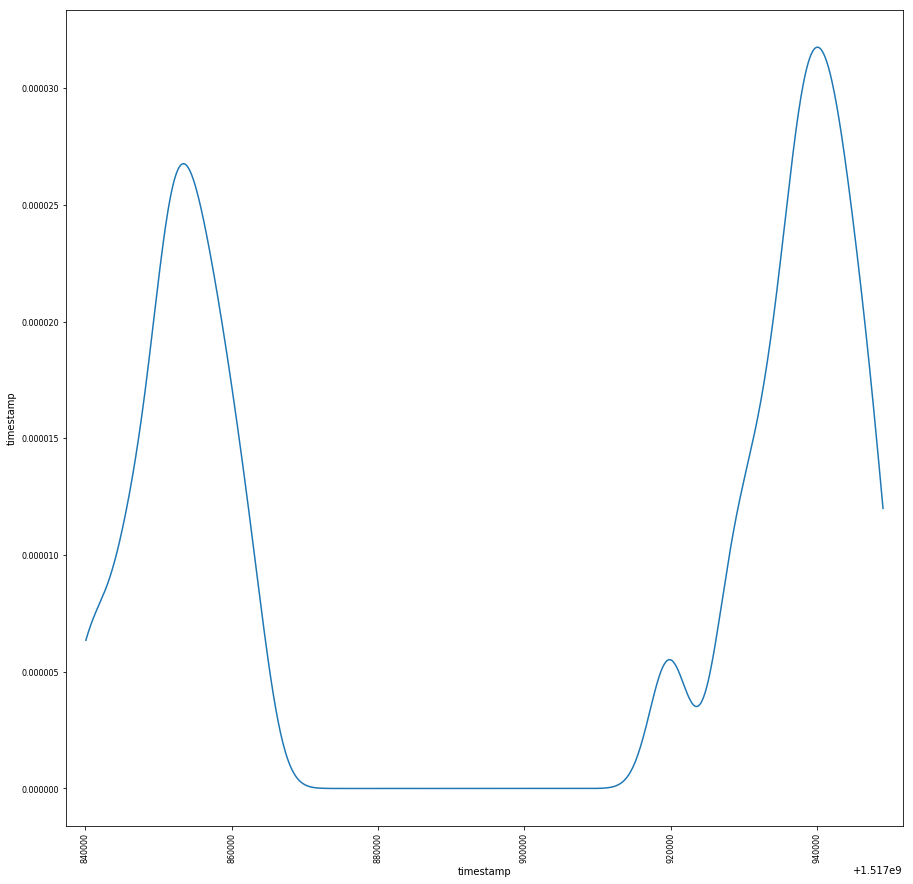

In [73]:
pd.scatter_matrix(data3[['timestamp', 'track_id', 'author_id', 'series_id', 'season', 'episode', 'episode_global', 'duration']], 
                  figsize=(15, 15), diagonal='kde')
plt.show()

In [63]:
data4 = catalog.where(catalog['track_id'] == 10885813).dropna()
data4.head()

,idec,track_id,video_id,series_id,title,season,episode,episode_global,date_efir,duration
22442,PR601726,10885813.0,4b6f60588f9377ed6b69d2ade9de57b3,10525091314,"САШАТАНЯ, 4 сезон, 2 серия",4,2,122,04.03.2018 15:00:00,1252
